In [3]:
!pip install torch torchvision

    100% |████████████████████████████████| 519.5MB 31kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58e4a000 @  0x7fa6a6f0d1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 12.0MB/s 
    100% |████████████████████████████████| 2.0MB 4.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


# Imports, Documentation


---



Imports necessary Torch, Torchvision, NumPy, and plotting libraries. 

Main Docs: https://pytorch.org/docs/stable/_modules/torch.html

Neural Networks: https://pytorch.org/docs/stable/nn.html

Functional: https://pytorch.org/docs/stable/_modules/torch/nn/functional.html 

Dataset Creation: https://pytorch.org/docs/stable/data.html

NumPy: https://docs.scipy.org/doc/numpy-1.15.1/reference/

Plotting: https://matplotlib.org/contents.html

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.core.debugger import set_trace
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from pprint import pprint




%matplotlib inline

# GPU Operations


---



Example: Set device to run on GPU if possible, otherwise run on CPU. GPU operations should be faster. 

Docs: https://pytorch.org/docs/stable/notes/cuda.html

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
device

device(type='cuda', index=0)

#Dataset Importing

TO DO: Implement Pandas methods to read in data from our polling

----

Each feature needs to be converted from a *numpy* object to a *torch* object to be used with PyTorch's library. They are mostly interchangeable.


  

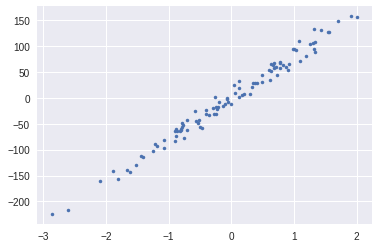

In [32]:
from sklearn.datasets import make_regression

n_features = 1
n_samples = 100

x, y = make_regression(n_samples = n_samples, n_features = n_features, noise = 10)

fix, ax = plt.subplots()
ax.plot(x, y, ".")

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

# Building Neural Nets

TO DO: Add in Relu layers, predict function

---

Every neural net in PyTorch has three core components:

**Model**: Defined by a class with minimally an \__init__() and forward() methods.This is where you actually build the graph your data will be traversing. 

**Loss Function**: This is how you determine how accurate your data is. If you have a line/model/etc predicting where your data will fall, and you have a data point not on that line/model, the distance between that point and your line is called "loss". Minimizing this loss is the ultimate goal of ML. Simplest of these is the MSE -- mean squared error 

**Optimizer**: This is our gradient descent. [SGD = Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), or "Iterative". Let's us incrementally optimize a differentiable object. The learning rate controls how fast we're iterating. "Too low" rates will take too long, "too high" rates will overshoot and fail. 


We build this model using existing data, and then we want to know whether it's successful. This means we need both **Training Data** and **Test Data**. In both cases, we have data which we know its classification. A classic example would be "Is this e-mail spam", where we have an e-mail and its features (subject line, e-mail origin, percent caps in body) and have labeled whether or not it's spam. In our case, we have a set of features (CPU usage, page faults, etc) and will be labelling whether or not the system is considered "thrashing" at that time. We feed the system this data, and it builds a model. 

Then we expose it to our test data. This data should be similar to the training data, except we don't tell the model what it's classified as (spam/not spam, thrashing/not thrashing). This is how we determine whether the model was built correctly. 

We have to be careful not to [overfit](https://www.investopedia.com/terms/o/overfitting.asp) our data. Your model will always be amazing at predicting its own training data, but if you feed it the exact same data points when testing it, you're feeding your own confirmation bias. Remember, ML is essentially overcomplicated linear regression, you have points on a graph and are drawing a line to match it. If you test it using the exact same/near identical points it already had, you haven't learned anything about your model. 

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class MyModel(nn.Module):
  def __init__(self, input_dimensions):
    super().__init__()
    self.linear_layer = nn.Linear(input_dimensions, 1)
    
  def forward(self, x):
    return self.linear_layer(x)

model = MyModel(n_features).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.00005)
criterion = nn.MSELoss()

x, y = x.to(device), y.to(device)

#Training Neural Nets

TO DO: Training needs to be part of the model itself

----

WIP


In [35]:
model.train()
optimizer.zero_grad()

y_next = model(x)
loss = criterion(y_next.squeeze(1), y) #Squeeze prevents mismatch error 

loss.backward(loss) 
optimizer.step() #updates params of lin reg model 

model.eval()
with torch.no_grad(): 
  y_next = model(x)
  

fig, ax = plt.subplots()
ax.plot(x.cpu().numpy(), y_next.cpu().numpy(), ".", label = "pred")
ax.plot(x.cpu().numpy(), y.cpu().numpy(), ".", label = "data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

AttributeError: ignored